In [1]:
import keras
import keras.backend as K
import tensorflow as tf 
import seaborn as sns
import cv2
import numpy as np 
import pandas as pd
from models import matting_net
from data_generator import *
# from metrics import * 

Using TensorFlow backend.
/Users/hyunkim/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hyunkim/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hyunkim/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [2]:
# model path for using in EDA
MODEL_PATH = "./trained_models/mattingnet/Strongmodels/455-0.03.h5"
IMG_PATHS = "./dataset/img_paths.npy"

In [3]:
img_paths = np.load(IMG_PATHS)
img_paths[:2]

array(['./dataset/selfie/testing/00001.png',
       './dataset/selfie/testing/00002.png'], dtype='<U35')

In [4]:
# test and store ious
model = matting_net((256,256,3), train=False)
model.load_weights(MODEL_PATH)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 256, 256, 8)  144         conv2d_1[0][0]                   
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 256, 256, 8)  0           separable_conv2d_1[0][0]         
____________________________________________________________________________________________

In [5]:
# data feeding logic
test_params = {
            'dim': (256,256),
            'batch_size': 1,
            'n_channels': 3,
            'shuffle': False,
            'augment': False,
            'train' : False,
        }

gen = DataGeneratorMatting(img_paths, **test_params)

In [6]:
# the metric
def iou_coef(y_true, y_pred, smooth=1):
    
    threshold = tf.constant(0.5, dtype=tf.float64)
    
    y_true = tf.cast(y_true > threshold, dtype=tf.float64)
    y_pred = tf.cast(y_pred > threshold, dtype=tf.float64)
    
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    
    return iou

In [ ]:
iou_list = []
for ge in gen:
    g, l = ge
    img = g
    preds = model.predict(img, verbose=1)
    
    trues_ = tf.constant(value=l[0], dtype=tf.float64)
    preds_ = tf.constant(preds, dtype=tf.float64) 

    iou = iou_coef(trues_, preds_, smooth=1)
    
    with tf.Session()  as sess :
        iou_ = sess.run(iou)
        print(iou_)
        iou_list.append(iou_)



1/1 [==============================] - 0s 69ms/step
2.6500596263415928e-05
1/1 [==============================] - 0s 71ms/step
2.4946987651241113e-05
1/1 [==============================] - 0s 68ms/step
2.9488956385833504e-05
1/1 [==============================] - 0s 74ms/step
9.558950044927066e-05
1/1 [==============================] - 0s 68ms/step
3.7616611495636476e-05
1/1 [==============================] - 0s 68ms/step
2.8149983110010135e-05
1/1 [==============================] - 0s 68ms/step
3.6934441366574334e-05
1/1 [==============================] - 0s 67ms/step
9.532888465204957e-05
1/1 [==============================] - 0s 68ms/step
1.9290123456790123e-05
1/1 [==============================] - 0s 68ms/step
3.077301821762679e-05
1/1 [==============================] - 0s 69ms/step
2.510859467195621e-05
1/1 [==============================] - 0s 68ms/step
2.5906064609725138e-05
1/1 [==============================] - 0s 69ms/step
8.206811653672549e-05
1/1 [=========================

2.2765560260438008e-05
1/1 [==============================] - 0s 69ms/step
2.3061666897283336e-05
1/1 [==============================] - 0s 67ms/step
3.5154945421947234e-05
1/1 [==============================] - 0s 69ms/step
0.00029568302779420464
1/1 [==============================] - 0s 71ms/step
4.625453872661255e-05
1/1 [==============================] - 0s 68ms/step
2.470599861646408e-05
1/1 [==============================] - 0s 69ms/step
2.733136547501913e-05
1/1 [==============================] - 0s 70ms/step
2.4522425758356017e-05
1/1 [==============================] - 0s 68ms/step
2.8172188415596124e-05
1/1 [==============================] - 0s 71ms/step
0.00041174855888004394
1/1 [==============================] - 0s 68ms/step
0.0001137365293298075
1/1 [==============================] - 0s 68ms/step
9.194275031413773e-05
1/1 [==============================] - 0s 69ms/step
3.360215053763441e-05
1/1 [==============================] - 0s 68ms/step
2.2993262973948632e-05
1/1 [===

1.9175455417066155e-05
1/1 [==============================] - 0s 68ms/step
1.855907353104933e-05
1/1 [==============================] - 0s 69ms/step
9.233184063524306e-05
1/1 [==============================] - 0s 67ms/step
2.2744848291861893e-05
1/1 [==============================] - 0s 68ms/step
2.199590876097046e-05
1/1 [==============================] - 0s 68ms/step
2.4030951866003412e-05
1/1 [==============================] - 0s 107ms/step
7.140986884387423e-05
1/1 [==============================] - 0s 68ms/step
1.8616080570396708e-05
1/1 [==============================] - 0s 68ms/step
0.00019339554223275153
1/1 [==============================] - 0s 72ms/step
3.704801422643746e-05
1/1 [==============================] - 0s 68ms/step
2.9475049370707695e-05
1/1 [==============================] - 0s 68ms/step
0.0014472361809045227
1/1 [==============================] - 0s 69ms/step
0.00019663749877101564
1/1 [==============================] - 0s 74ms/step
3.346832223300646e-05
1/1 [===

1/1 [==============================] - 0s 82ms/step
3.778289945970454e-05
1/1 [==============================] - 0s 80ms/step
4.2634832658281814e-05
1/1 [==============================] - 0s 79ms/step
0.00047519217330538083
1/1 [==============================] - 0s 81ms/step
2.5112377891062503e-05
1/1 [==============================] - 0s 74ms/step
0.00014869004074107118
1/1 [==============================] - 0s 69ms/step
0.000338282277767337
1/1 [==============================] - 0s 71ms/step
9.611687812379854e-05
1/1 [==============================] - 0s 86ms/step
7.722007722007723e-05
1/1 [==============================] - 0s 70ms/step
3.3640584000538246e-05
1/1 [==============================] - 0s 82ms/step
0.00023600676552727845
1/1 [==============================] - 0s 67ms/step
2.549199551340879e-05
1/1 [==============================] - 0s 67ms/step
0.0001277751157961987
1/1 [==============================] - 0s 82ms/step
4.650946467606158e-05
1/1 [============================

2.6362965306337657e-05
1/1 [==============================] - 0s 72ms/step
2.831738120858583e-05
1/1 [==============================] - 0s 75ms/step
3.868471953578336e-05
1/1 [==============================] - 0s 82ms/step
8.176614881439084e-05
1/1 [==============================] - 0s 70ms/step
3.146831141040972e-05
1/1 [==============================] - 0s 73ms/step
5.153842189352162e-05
1/1 [==============================] - 0s 71ms/step
6.26017278076875e-05
1/1 [==============================] - 0s 85ms/step
7.092198581560284e-05
1/1 [==============================] - 0s 72ms/step
3.750234389649353e-05
1/1 [==============================] - 0s 71ms/step
3.094059405940594e-05
1/1 [==============================] - 0s 73ms/step
0.00017640832647300954
1/1 [==============================] - 0s 73ms/step
2.7950136955671083e-05
1/1 [==============================] - 0s 72ms/step
6.078657832350617e-05
1/1 [==============================] - 0s 78ms/step
6.883259911894274e-05
1/1 [=========

1/1 [==============================] - 0s 72ms/step
3.2533021016331574e-05
1/1 [==============================] - 0s 70ms/step
2.2797738464344337e-05
1/1 [==============================] - 0s 72ms/step
0.00016950876360307827
1/1 [==============================] - 0s 71ms/step
8.879680331508066e-05
1/1 [==============================] - 0s 71ms/step
3.0501753850846423e-05
1/1 [==============================] - 0s 78ms/step
0.0001840942562592047
1/1 [==============================] - 0s 82ms/step
0.0002765550459772764
1/1 [==============================] - 0s 76ms/step
3.340124920672033e-05
1/1 [==============================] - 0s 74ms/step
0.0001954843123839312
1/1 [==============================] - 0s 92ms/step
3.545093590470789e-05
1/1 [==============================] - 0s 72ms/step
0.000259302476338649
1/1 [==============================] - 0s 75ms/step
3.259027506192152e-05
1/1 [==============================] - 0s 75ms/step
0.00011527111766875691
1/1 [=============================

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [11]:
len(iou_list)

[array([7.51783607e-07]),
 array([1.63014065e-06]),
 array([7.39668495e-07]),
 array([1.61313479e-06]),
 array([7.39563465e-07]),
 array([1.72993321e-06]),
 array([7.60781993e-07]),
 array([1.66699729e-06]),
 array([7.94706618e-07]),
 array([1.79230099e-06]),
 array([4.55965676e-05]),
 array([3.32546307e-06]),
 array([6.86977382e-07]),
 array([1.55898498e-06]),
 array([9.26925804e-07]),
 array([1.70537295e-06]),
 array([9.19989439e-07]),
 array([1.70435275e-06]),
 array([9.12813529e-07]),
 array([2.2015319e-05]),
 array([9.66846822e-07]),
 array([4.33212103e-05]),
 array([1.05152139e-06]),
 array([2.22194571e-05]),
 array([9.81728077e-07]),
 array([1.99603189e-06]),
 array([0.00019703]),
 array([1.227162e-05]),
 array([9.9930049e-07]),
 array([2.07225111e-05]),
 array([0.00017491]),
 array([1.86622872e-06]),
 array([8.88231203e-07]),
 array([1.82973912e-06]),
 array([2.94395537e-05]),
 array([2.36832133e-05]),
 array([8.43383655e-07]),
 array([1.71197699e-06]),
 array([7.87937621e-07])

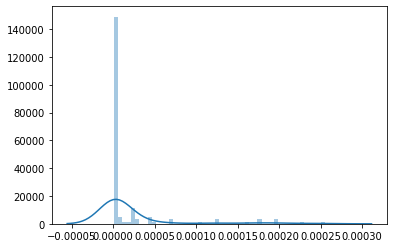

In [10]:
sns.distplot(iou_list)